# Part I - Exploration of Trips Dataset 
## by Emmanuel Gyan Ghanney 

## Introduction
> The dataset consist of bike trip data over a period of time. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Reading csv file

tripdata = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Viewing info about the dataset

tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Viewing first 50 elements of the dataset

tripdata.head(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
# Checking for unique values

tripdata.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [6]:
# Checking for unique values in member_birth_year column

tripdata.member_birth_year.unique()

array([1984.,   nan, 1972., 1989., 1974., 1959., 1983., 1988., 1992.,
       1996., 1993., 1990., 1981., 1975., 1978., 1991., 1997., 1986.,
       2000., 1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967.,
       1998., 1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964.,
       1965., 1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970.,
       1956., 1957., 1945., 1900., 1952., 1948., 1951., 1941., 1950.,
       1949., 1953., 1955., 1946., 1947., 1931., 1943., 1942., 1920.,
       1933., 2001., 1878., 1901., 1944., 1928., 1934., 1939., 1930.,
       1902., 1910., 1938., 1927.])

In [7]:
# Checking for unique values in member_gender 

tripdata.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [8]:
# Checking the number of empty records in the member_birth_year column 

tripdata.member_birth_year.isna().sum()

8265

In [9]:
# Removing all null records from the table 

tripdata_final = tripdata.dropna()

In [10]:
# Cheching the infomation of the dataset 

tripdata_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [11]:
#Changing data type from string to datetime 

tripdata_final['start_time'] = pd.to_datetime(tripdata_final['start_time'])
tripdata_final['end_time'] = pd.to_datetime(tripdata_final['end_time'])

# Removing the time from the string datetime
tripdata_final['start_ttime'] = pd.to_datetime(tripdata_final['start_time']).dt.strftime('%H:%M')
tripdata_final['end_ttime'] = pd.to_datetime(tripdata_final['end_time']).dt.strftime('%H:%M')

C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\2612408730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripdata_final['start_time'] = pd.to_datetime(tripdata_final['start_time'])
C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\2612408730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripdata_final['end_time'] = pd.to_datetime(tripdata_final['end_time'])
C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\2612408730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [12]:
# Test code 

tripdata_final.start_ttime

0         17:32
2         12:13
3         17:54
4         23:54
5         23:49
          ...  
183407    00:04
183408    00:05
183409    00:06
183410    00:05
183411    00:00
Name: start_ttime, Length: 174952, dtype: object

In [13]:
#  Change data type from string to datetime

tripdata_final['start_hour'] = pd.to_datetime(tripdata_final['start_ttime'], format='%H:%M').dt.hour
tripdata_final['end_hour'] = pd.to_datetime(tripdata_final['end_ttime'], format='%H:%M').dt.hour

C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\1662364115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripdata_final['start_hour'] = pd.to_datetime(tripdata_final['start_ttime'], format='%H:%M').dt.hour
C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\1662364115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripdata_final['end_hour'] = pd.to_datetime(tripdata_final['end_ttime'], format='%H:%M').dt.hour


In [14]:
# Creating period name for the hours 

tripdata_final['start_session'] = pd.DataFrame({'start_hour':range(1, 25)})

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
tripdata_final['start_session'] = pd.cut(tripdata_final['start_hour'], bins=b, labels=l, include_lowest=True)


tripdata_final['end_session'] = pd.DataFrame({'end_hour':range(1, 25)})

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
tripdata_final['end_session'] = pd.cut(tripdata_final['end_hour'], bins=b, labels=l, include_lowest=True)

C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\144938201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripdata_final['start_session'] = pd.DataFrame({'start_hour':range(1, 25)})
C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\144938201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripdata_final['start_session'] = pd.cut(tripdata_final['start_hour'], bins=b, labels=l, include_lowest=True)
C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\144938201.py:10: SettingWithCopyWarning: 
A value is

In [15]:
# Test Code 

tripdata_final.start_session

0                Eve
2            Morning
3                Eve
4              Night
5              Night
             ...    
183407    Late Night
183408    Late Night
183409    Late Night
183410    Late Night
183411    Late Night
Name: start_session, Length: 174952, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Eve' < 'Night']

In [16]:
# Test code 

tripdata_final.end_session

0         Early Morning
2         Early Morning
3            Late Night
4            Late Night
5            Late Night
              ...      
183407       Late Night
183408       Late Night
183409       Late Night
183410       Late Night
183411       Late Night
Name: end_session, Length: 174952, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Eve' < 'Night']

In [17]:
# Test Code 

tripdata_final.end_hour

0         8
2         5
3         4
4         0
5         0
         ..
183407    0
183408    0
183409    0
183410    0
183411    0
Name: end_hour, Length: 174952, dtype: int64

In [18]:
# convert member_birth_year from float into int 
tripdata_final['member_birth_year'] = tripdata_final['member_birth_year'].astype(int)

C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\1990215413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripdata_final['member_birth_year'] = tripdata_final['member_birth_year'].astype(int)


In [19]:
# Test Code 

tripdata_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> The data consist of 16 columns and 183412 rows

### What is/are the main feature(s) of interest in your dataset?

> With the exception of member_birth_year, member_gender, start_station_id, start_station_name, end_station_id and end_station_name all the remaining columns have no none-null values
> Most of the columns have wrong data types which will be rectified 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> My investigation will mainly base on the gender , user type, bike id, birth year, duration bike share trip and start trip station name. 

## Univariate Exploration

> In this section, I will be investigating the distributions of individual variables. 




>  What is the distribution of gender?

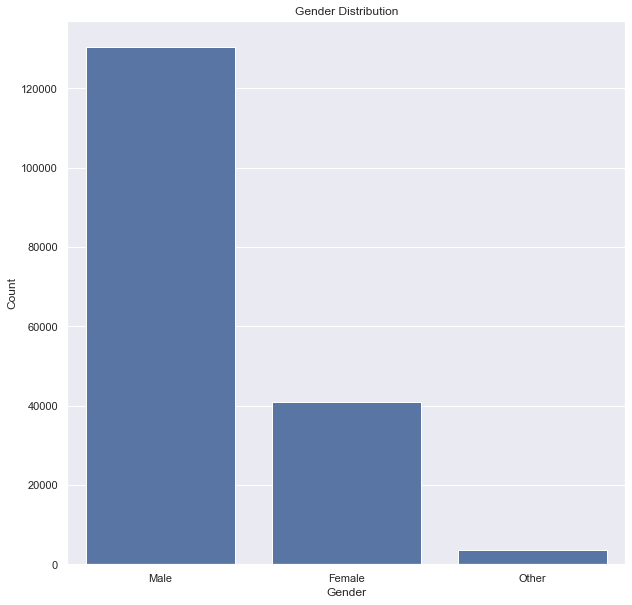

In [24]:
base_color = sb.color_palette()[0]
gen_order = tripdata_final['member_gender'].value_counts().index
sb.countplot(data = tripdata_final, x = 'member_gender', color = base_color, order = gen_order);

plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')
def sb_customize():
    sb.set(rc={'figure.figsize':(10,10)})
    
    return

sb_customize()


## Answer 

> It is clear that there are more males conpared to female and other gender

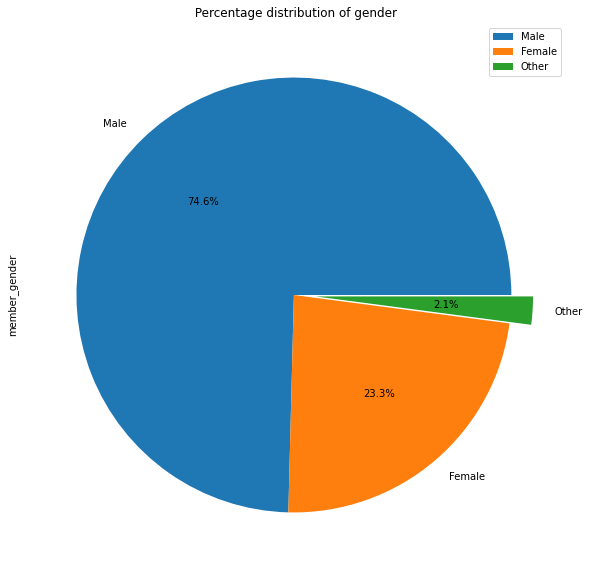

In [20]:
# Plotting the percentage distribution of the gender column

gen_per = tripdata_final['member_gender'].value_counts()

gen_per.plot.pie( title=" Percentage distribution of gender", legend=True, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=False, startangle=0, figsize=(10, 10));

> The two visualizations are very relevant to the project, because it gives an understanding to how gender is distributed in the dataset. It show the level of distribution in terms of number and percentages. It shows that there are more males compared to females and other gender types. 

> What is the distribution of user type?

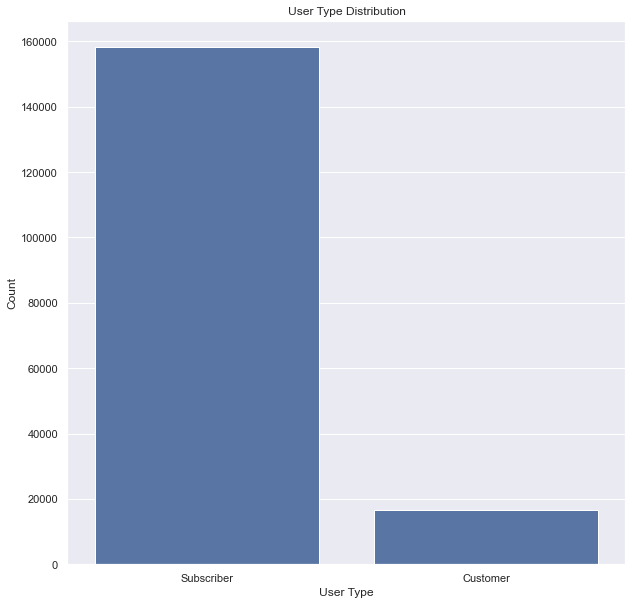

In [25]:
gen_order = tripdata_final['user_type'].value_counts().index

sb.countplot(data = tripdata_final, x = 'user_type', color = base_color, order = gen_order);

plt.title('User Type Distribution')
plt.ylabel('Count')
plt.xlabel('User Type')


sb_customize()
    

## Reason for Visualization 

> This visaulization helps us to understand in terms of count number how many customer and subscribers we have in the dataset. According to the dataset there are more subcribers that customers. 

In [27]:
# Getting the name for the days of the week 

tripdata_final['start_day'] = tripdata_final['start_time'].dt.day_name()



C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\1576993536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripdata_final['start_day'] = tripdata_final['start_time'].dt.day_name()


## Question 

> What is the data distribution interms of days of the week?

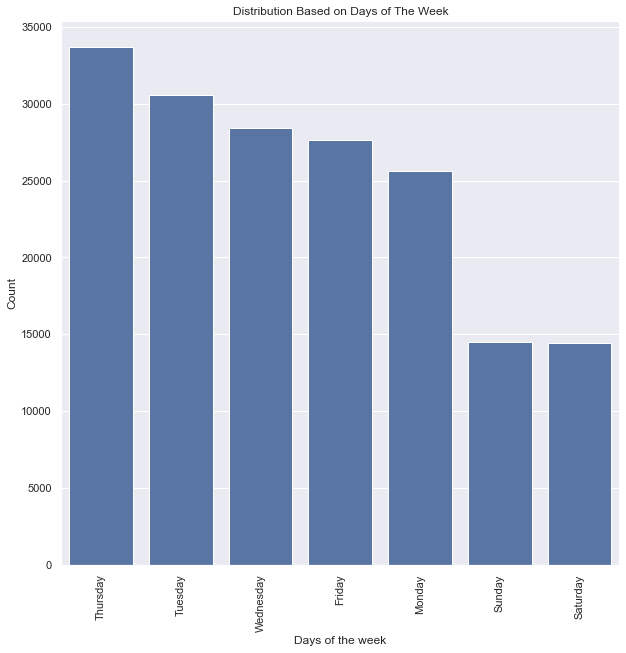

In [29]:
# Plotting the days of the week against the total counts 

base_color = sb.color_palette()[0]
gen_order = tripdata_final['start_day'].value_counts().index
sb.countplot(data = tripdata_final, x = 'start_day', color = base_color, order = gen_order);
plt.xticks(rotation=90);

plt.title('Distribution Based on Days of The Week')
plt.ylabel('Count')
plt.xlabel('Days of the week')

sb_customize()
    

## Reason for visualization 

This visualization is relevant because, it helps us to understand the data in terms of its distribution according to the days of the week. It is evident that Thursday had the most rides in the said period. 

## Question 

> What time frame consituted the most start rides ?

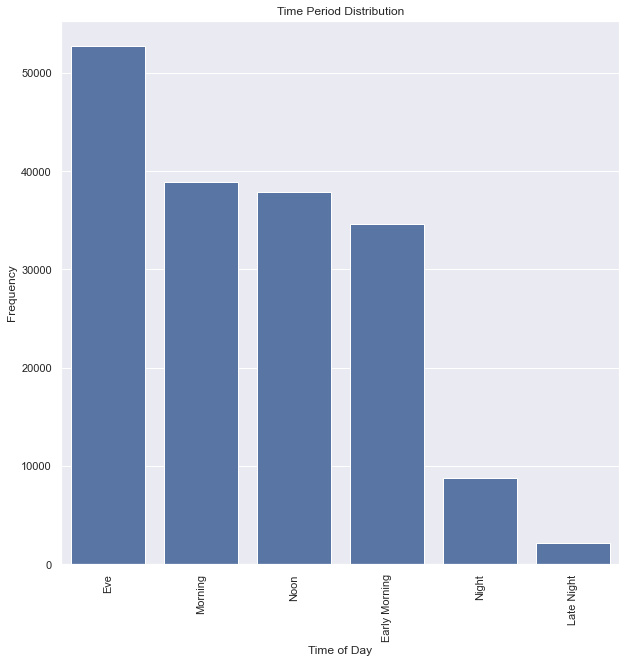

In [30]:
# Ploting time of day against frequency 

base_color = sb.color_palette()[0]
gen_order = tripdata_final['start_session'].value_counts().index
sb.countplot(data = tripdata_final, x = 'start_session', color = base_color, order = gen_order);
plt.xticks(rotation=90);

plt.title('Time Period Distribution')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')

sb_customize()

##  Answer 

> This visualization helps us to understand timing the constuted to most rides. It was found that Eve which represent 17:00 to 20:00 recorded the most ride starts. While late night (21:00 - 24:00) recorded the least start rides 

## Question

What time frame consituted the most end rides ?

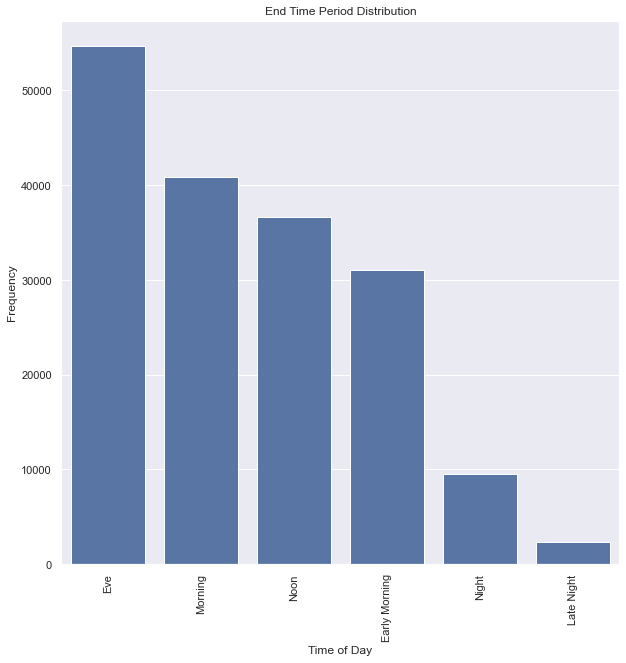

In [31]:
# Plotting a bar chart of count distribution based on time frame

base_color = sb.color_palette()[0]
gen_order = tripdata_final['end_session'].value_counts().index
sb.countplot(data = tripdata_final, x = 'end_session', color = base_color, order = gen_order);
plt.xticks(rotation=90);

plt.title('End Time Period Distribution')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')

sb_customize()
    

## Answer 

This visualization helps us to understand timing the constuted to most end rides. It was found that Eve which represent 17:00 to 20:00 recorded the most ride end. While late night (21:00 - 24:00) recorded the least end rides

## Question

> What is the distribution of bike share for all trips in terms of count?


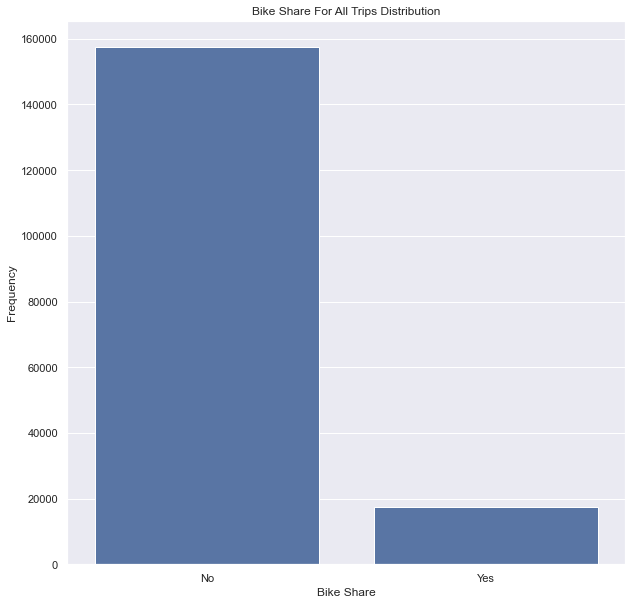

In [32]:
# Plotting bike share for all trip against 

base_color = sb.color_palette()[0]
gen_order = tripdata_final['bike_share_for_all_trip'].value_counts().index
sb.countplot(data = tripdata_final, x = 'bike_share_for_all_trip', color = base_color, order = gen_order);

plt.title('Bike Share For All Trips Distribution')
plt.xlabel('Bike Share')
plt.ylabel('Frequency')

sb_customize()

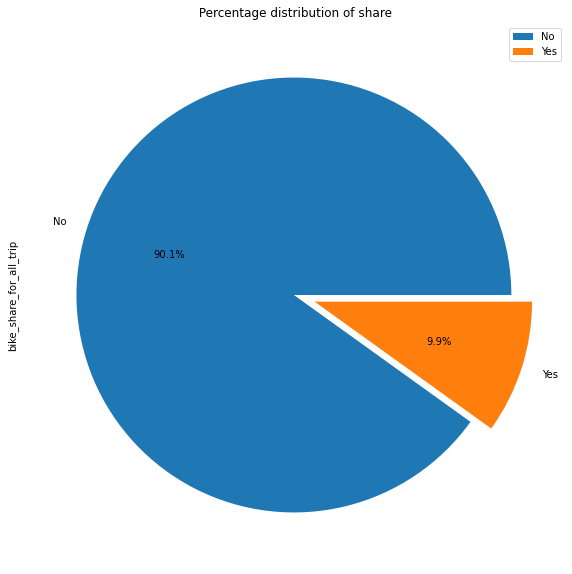

In [28]:
#Plotting pie chart representing the bikes shared for all trips in percentages

share_per = tripdata_final['bike_share_for_all_trip'].value_counts()

share_per.plot.pie( title=" Percentage distribution of share", legend=True, \
                   autopct='%1.1f%%', explode=(0, 0.1), \
                   shadow=False, startangle=0, figsize=(10, 10));

## Answer 

> This visualization helps us to undertsand the number of bike trips for all that were shared.

In [78]:
# Top ten most used starting stations
most_used_start_stations = tripdata_final[['start_station_name','duration_hours']].groupby(['start_station_name'])['duration_hours'].size().nlargest(10).reset_index(name='top10')


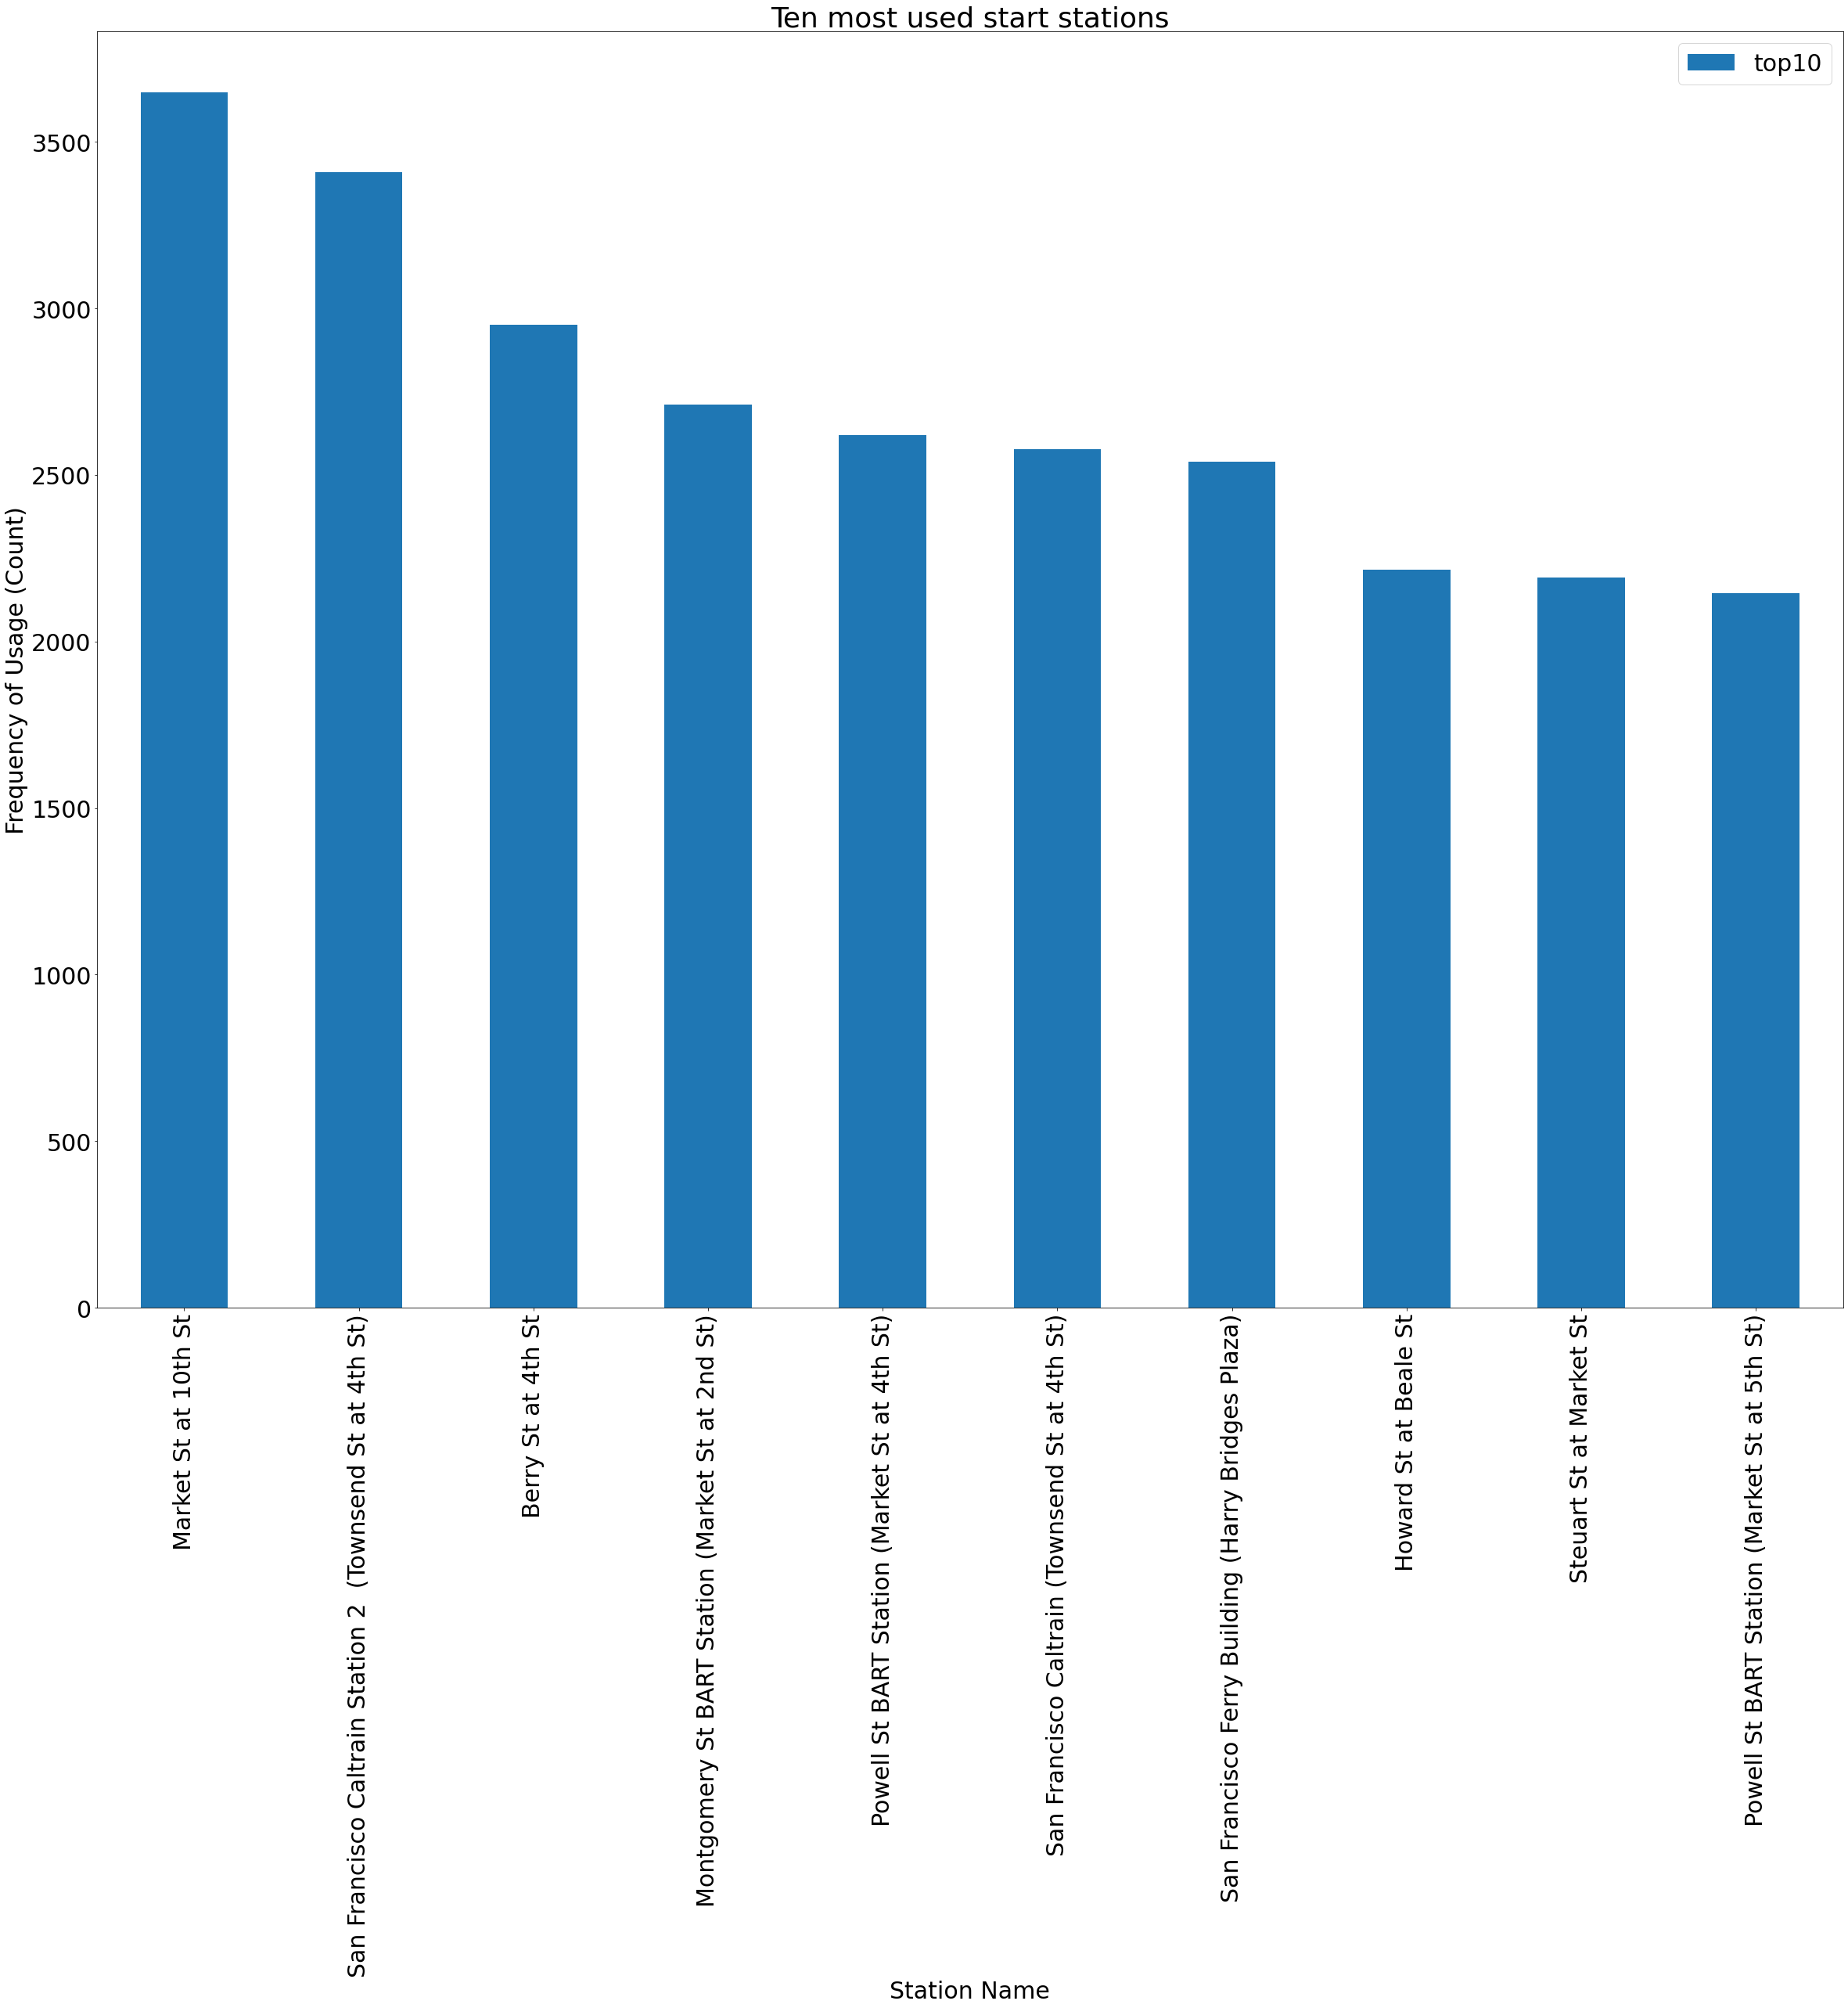

In [87]:
# Plotting most used stations againts count

most_used_start_stations.plot.bar(x='start_station_name', y='top10', rot=0, xlabel = 'Station Name', ylabel='Frequency of Usage (Count)', title = 'Ten most used start stations')

def customize(): 
    plt.rcParams["figure.figsize"] = (40, 30)
    plt.rcParams.update({'font.size': 30})
    plt.xticks(rotation=90)
    plt.show()
    return

customize();

## Answer 

> This visualization help us to know the most used start staion. This help in knowing where most people visit. It is very clear from the visuals that Market Street at 10th street had the most start rides 



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, I will be investigating the relationships between pairs of variables in your
data. Making  sure the variables that is covered here have been introduced in some
fashion in the previous section (univariate exploration).

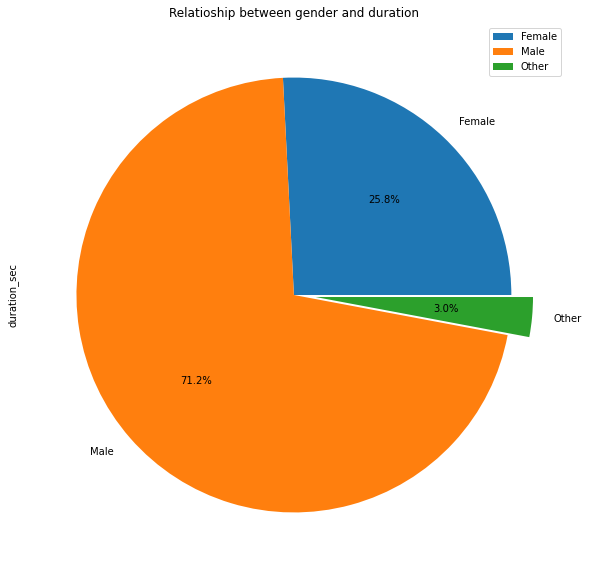

In [29]:
gender_based_agg = tripdata_final.groupby('member_gender')['duration_sec'].sum()

plot_pie = gender_based_agg.plot.pie( title="Relatioship between gender and duration", legend=True, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=False, startangle=0, figsize=(10, 10))

> What is the relationship between birth year and duration?

In [34]:
tripdata_final['duration_hours'] = tripdata_final.duration_sec/3600

C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\596182768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripdata_final['duration_hours'] = tripdata_final.duration_sec/3600


In [35]:
tripdata_final.duration_hours 

0         14.495833
2         17.181667
3         10.136111
4          0.440278
5          0.498056
            ...    
183407     0.133333
183408     0.086944
183409     0.039167
183410     0.038611
183411     0.075278
Name: duration_hours, Length: 174952, dtype: float64

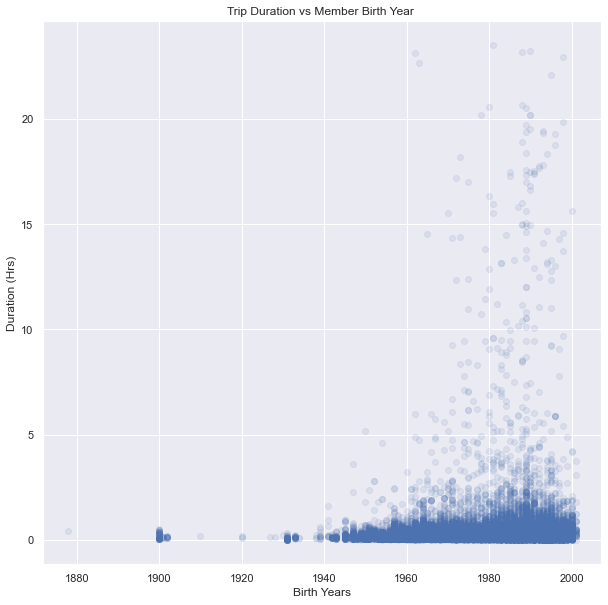

In [36]:
# Plotting a scatter plot of member birth month against Trip duration in hours 

sb.regplot(data = tripdata_final, x = 'member_birth_year', y = 'duration_hours', scatter_kws = {'alpha':1/10},fit_reg=False)

plt.title('Trip Duration vs Member Birth Year ')
plt.xlabel('Birth Years')
plt.ylabel('Duration (Hrs)')

sb_customize()
    

## Reason 

> This visualisation is relevant because it helps us to understand how age in terms of year of bith infuences the trip duration.

C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\2373217697.py:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(data = tripdata_final, x = 'member_birth_year', y = 'duration_hours', cmin = 0.5, cmap='viridis_r' )
C:\Users\alaha\AppData\Local\Temp\ipykernel_30320\2373217697.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


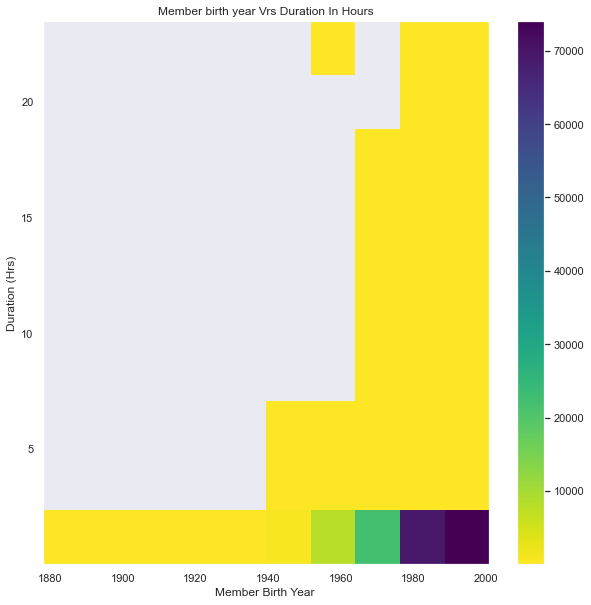

In [37]:
plt.hist2d(data = tripdata_final, x = 'member_birth_year', y = 'duration_hours', cmin = 0.5, cmap='viridis_r' )
plt.colorbar();

plt.title('Member birth year Vrs Duration In Hours')
plt.xlabel('Member Birth Year ')
plt.ylabel('Duration (Hrs)')
sb_customize();
    

## Answer 

> This visualisation is relevant because it helps us to understand how age in terms of year of bith infuences the trip. This presents the data using a heatmap

## Question 

> What is the distribution of gender in terms of average trip duration? 

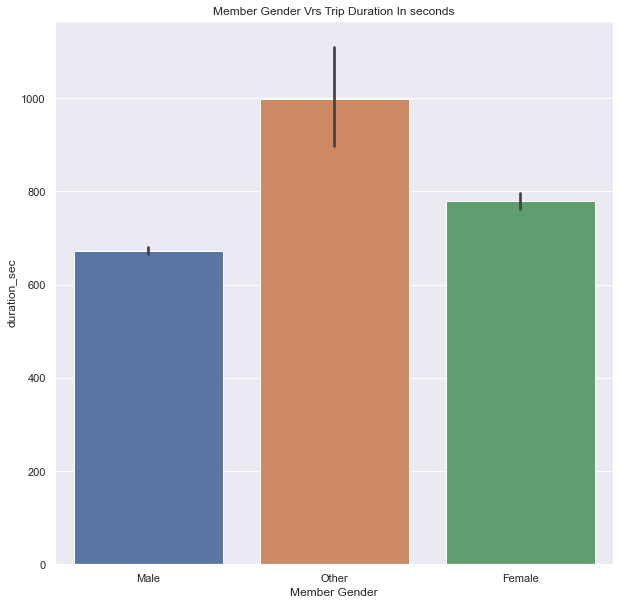

In [40]:
# Plotting average trip duration in seconds againt gender of the member 


sb.barplot(data = tripdata_final, x = 'member_gender', y = 'duration_sec')

plt.ylabel = ('Avrage Duration (Secs)')

plt.title('Member Gender Vrs Trip Duration In seconds')
plt.xlabel('Member Gender')


sb_customize();
    

In [74]:
most_used_bikes = tripdata_final[['bike_id','duration_hours']].groupby(['bike_id'])['duration_hours'].sum().nlargest(10).reset_index(name='top10')

# Top ten most least used bikes 
least_used_bikes = tripdata_final[['bike_id','duration_hours']].groupby(['bike_id'])['duration_hours'].sum().nsmallest(10).reset_index(name='top10')

# Top ten most used starting stations
most_used_start_stations = tripdata_final[['start_station_id','duration_hours']].groupby(['start_station_id'])['duration_hours'].size().nlargest(10).reset_index(name='top10')

# Top ten least used starting stations stations 
least_used_start_stations = tripdata_final[['start_station_id','duration_hours']].groupby(['start_station_id'])['duration_hours'].size().nsmallest(10).reset_index(name='top10')

                            

## Question 

> What is the relation between the top ten most used bike in terms of total hours used?


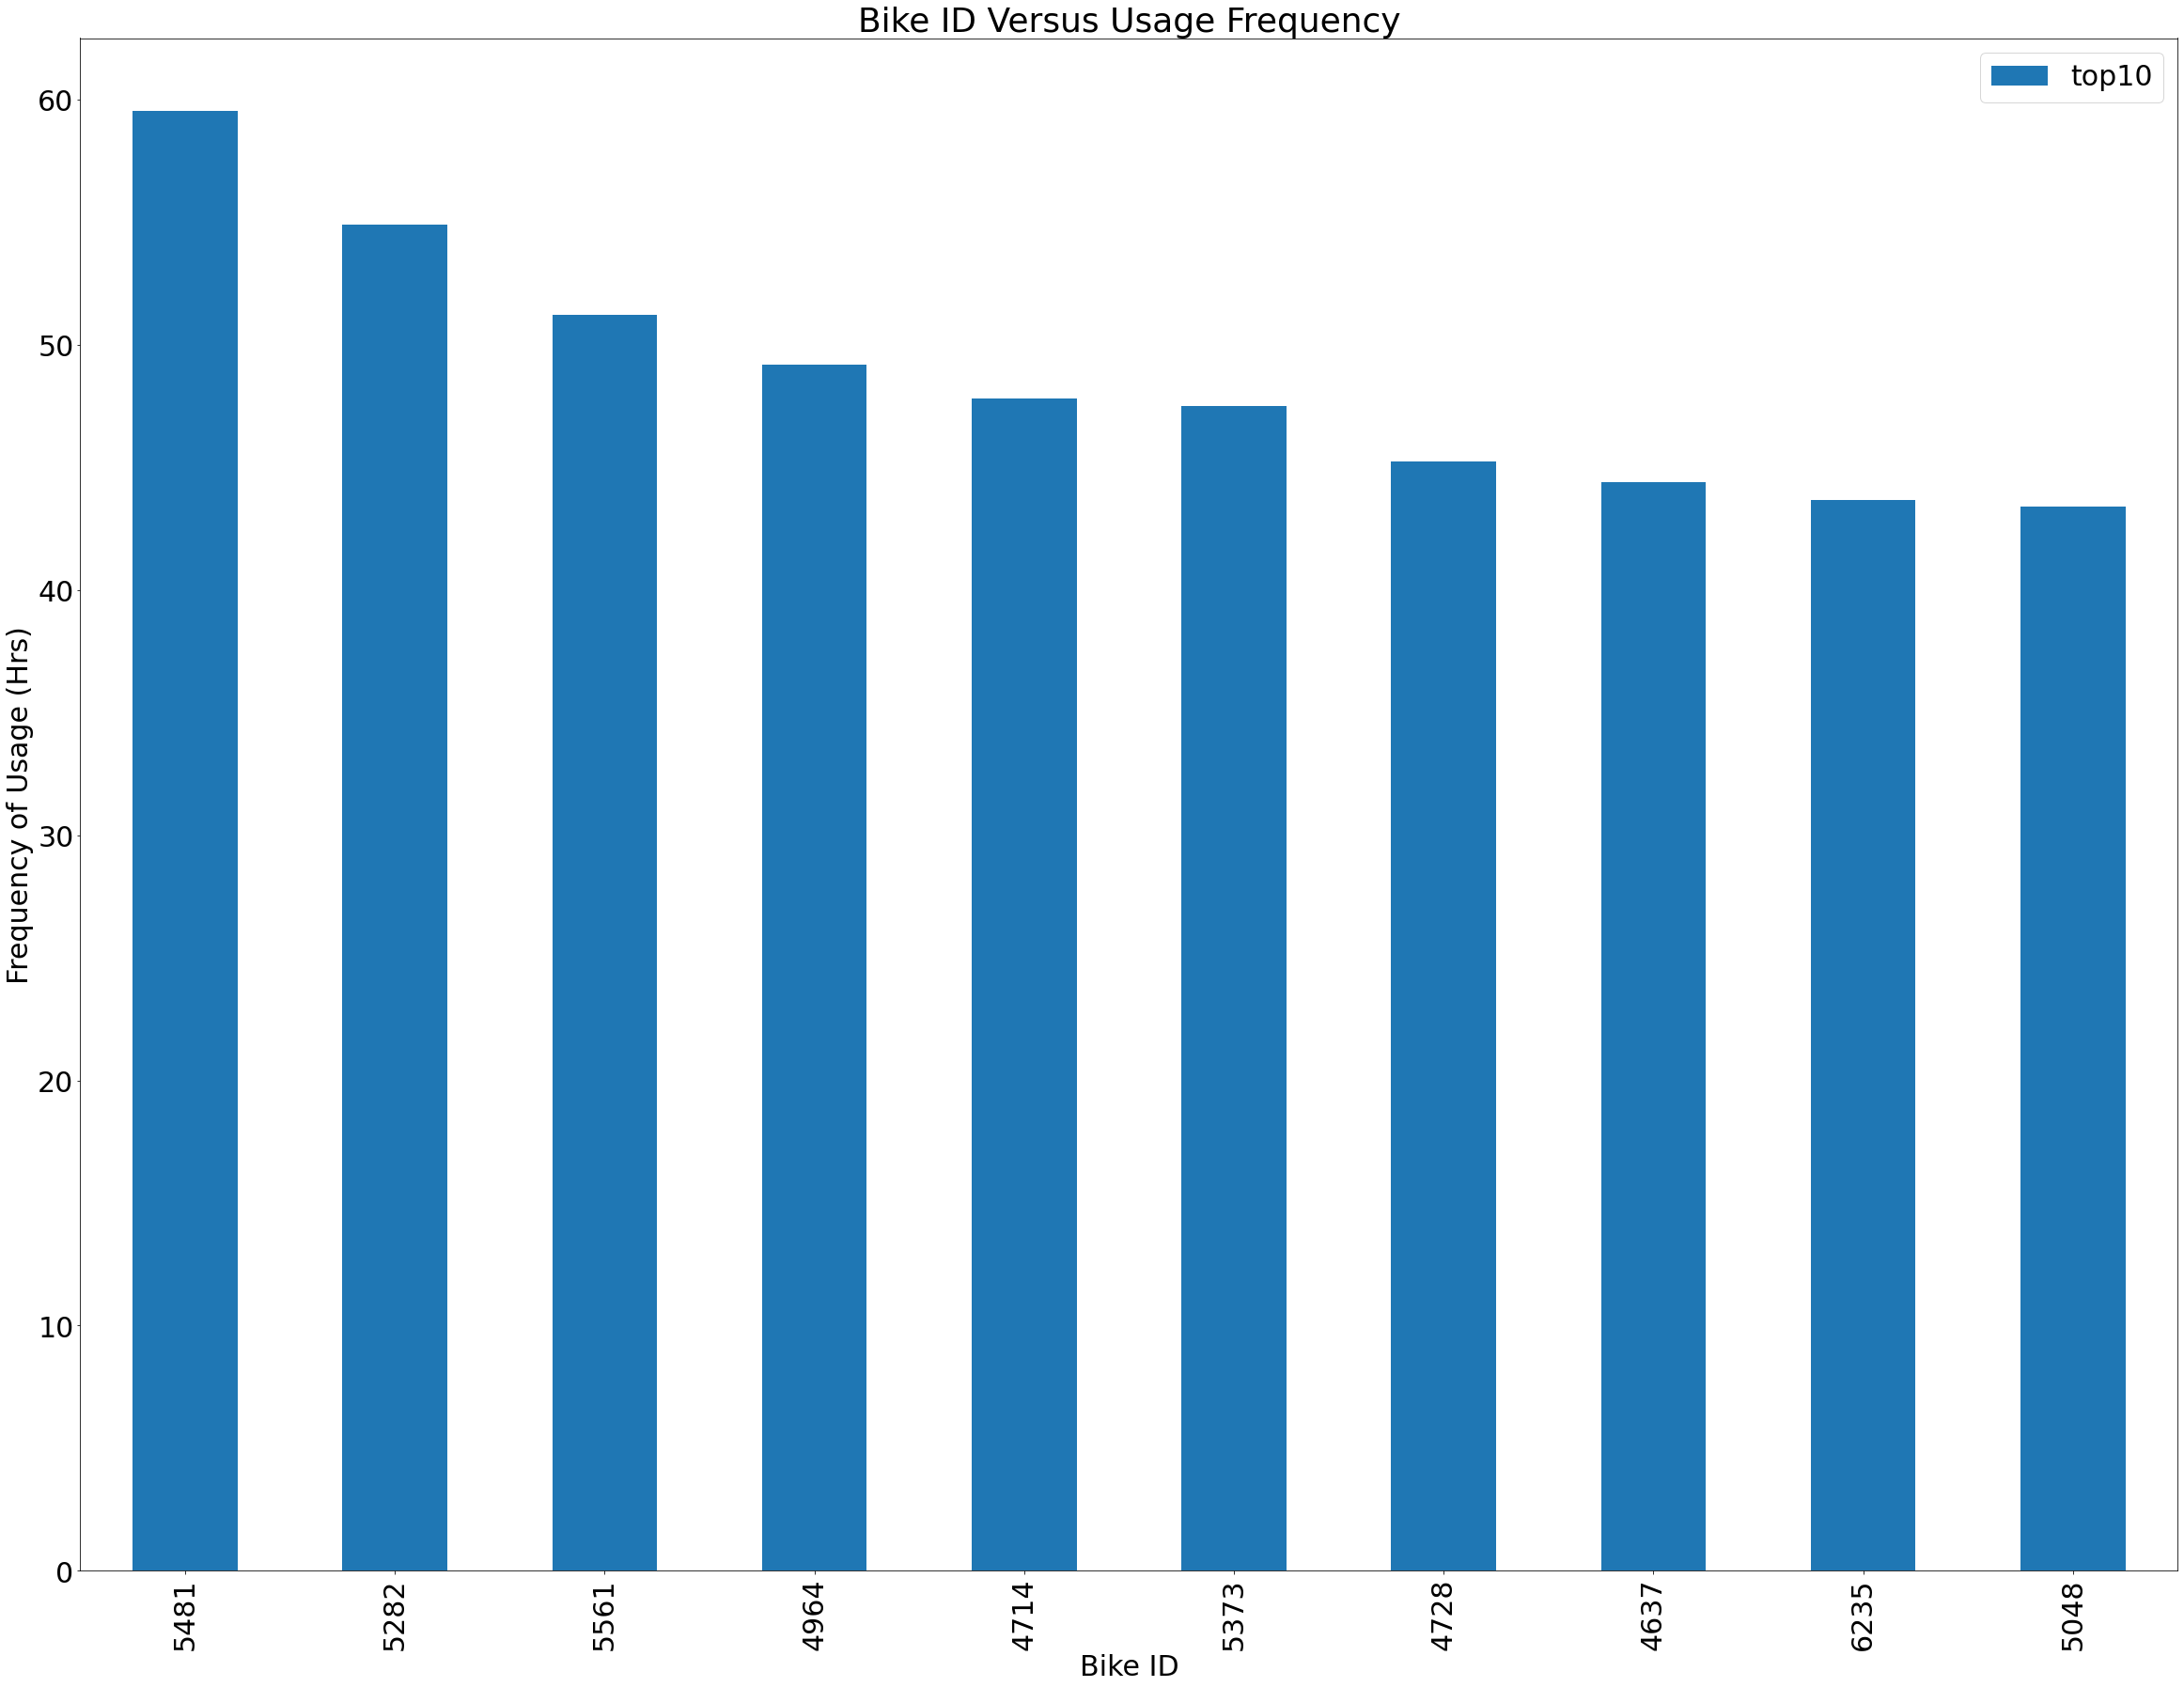

In [73]:
# Plotting bike id against duration 

most_used_bikes.plot.bar(x='bike_id', y='top10', rot=0, xlabel = 'Bike ID', ylabel='Frequency of Usage (Hrs)', title = 'Bike ID Versus Usage Frequency')

customize()

## Answer 

> What is the least used bike?

<AxesSubplot:title={'center':'Ten Least Used Bikes '}, xlabel='Bike ID', ylabel='Frequency of Usage (Hrs)'>

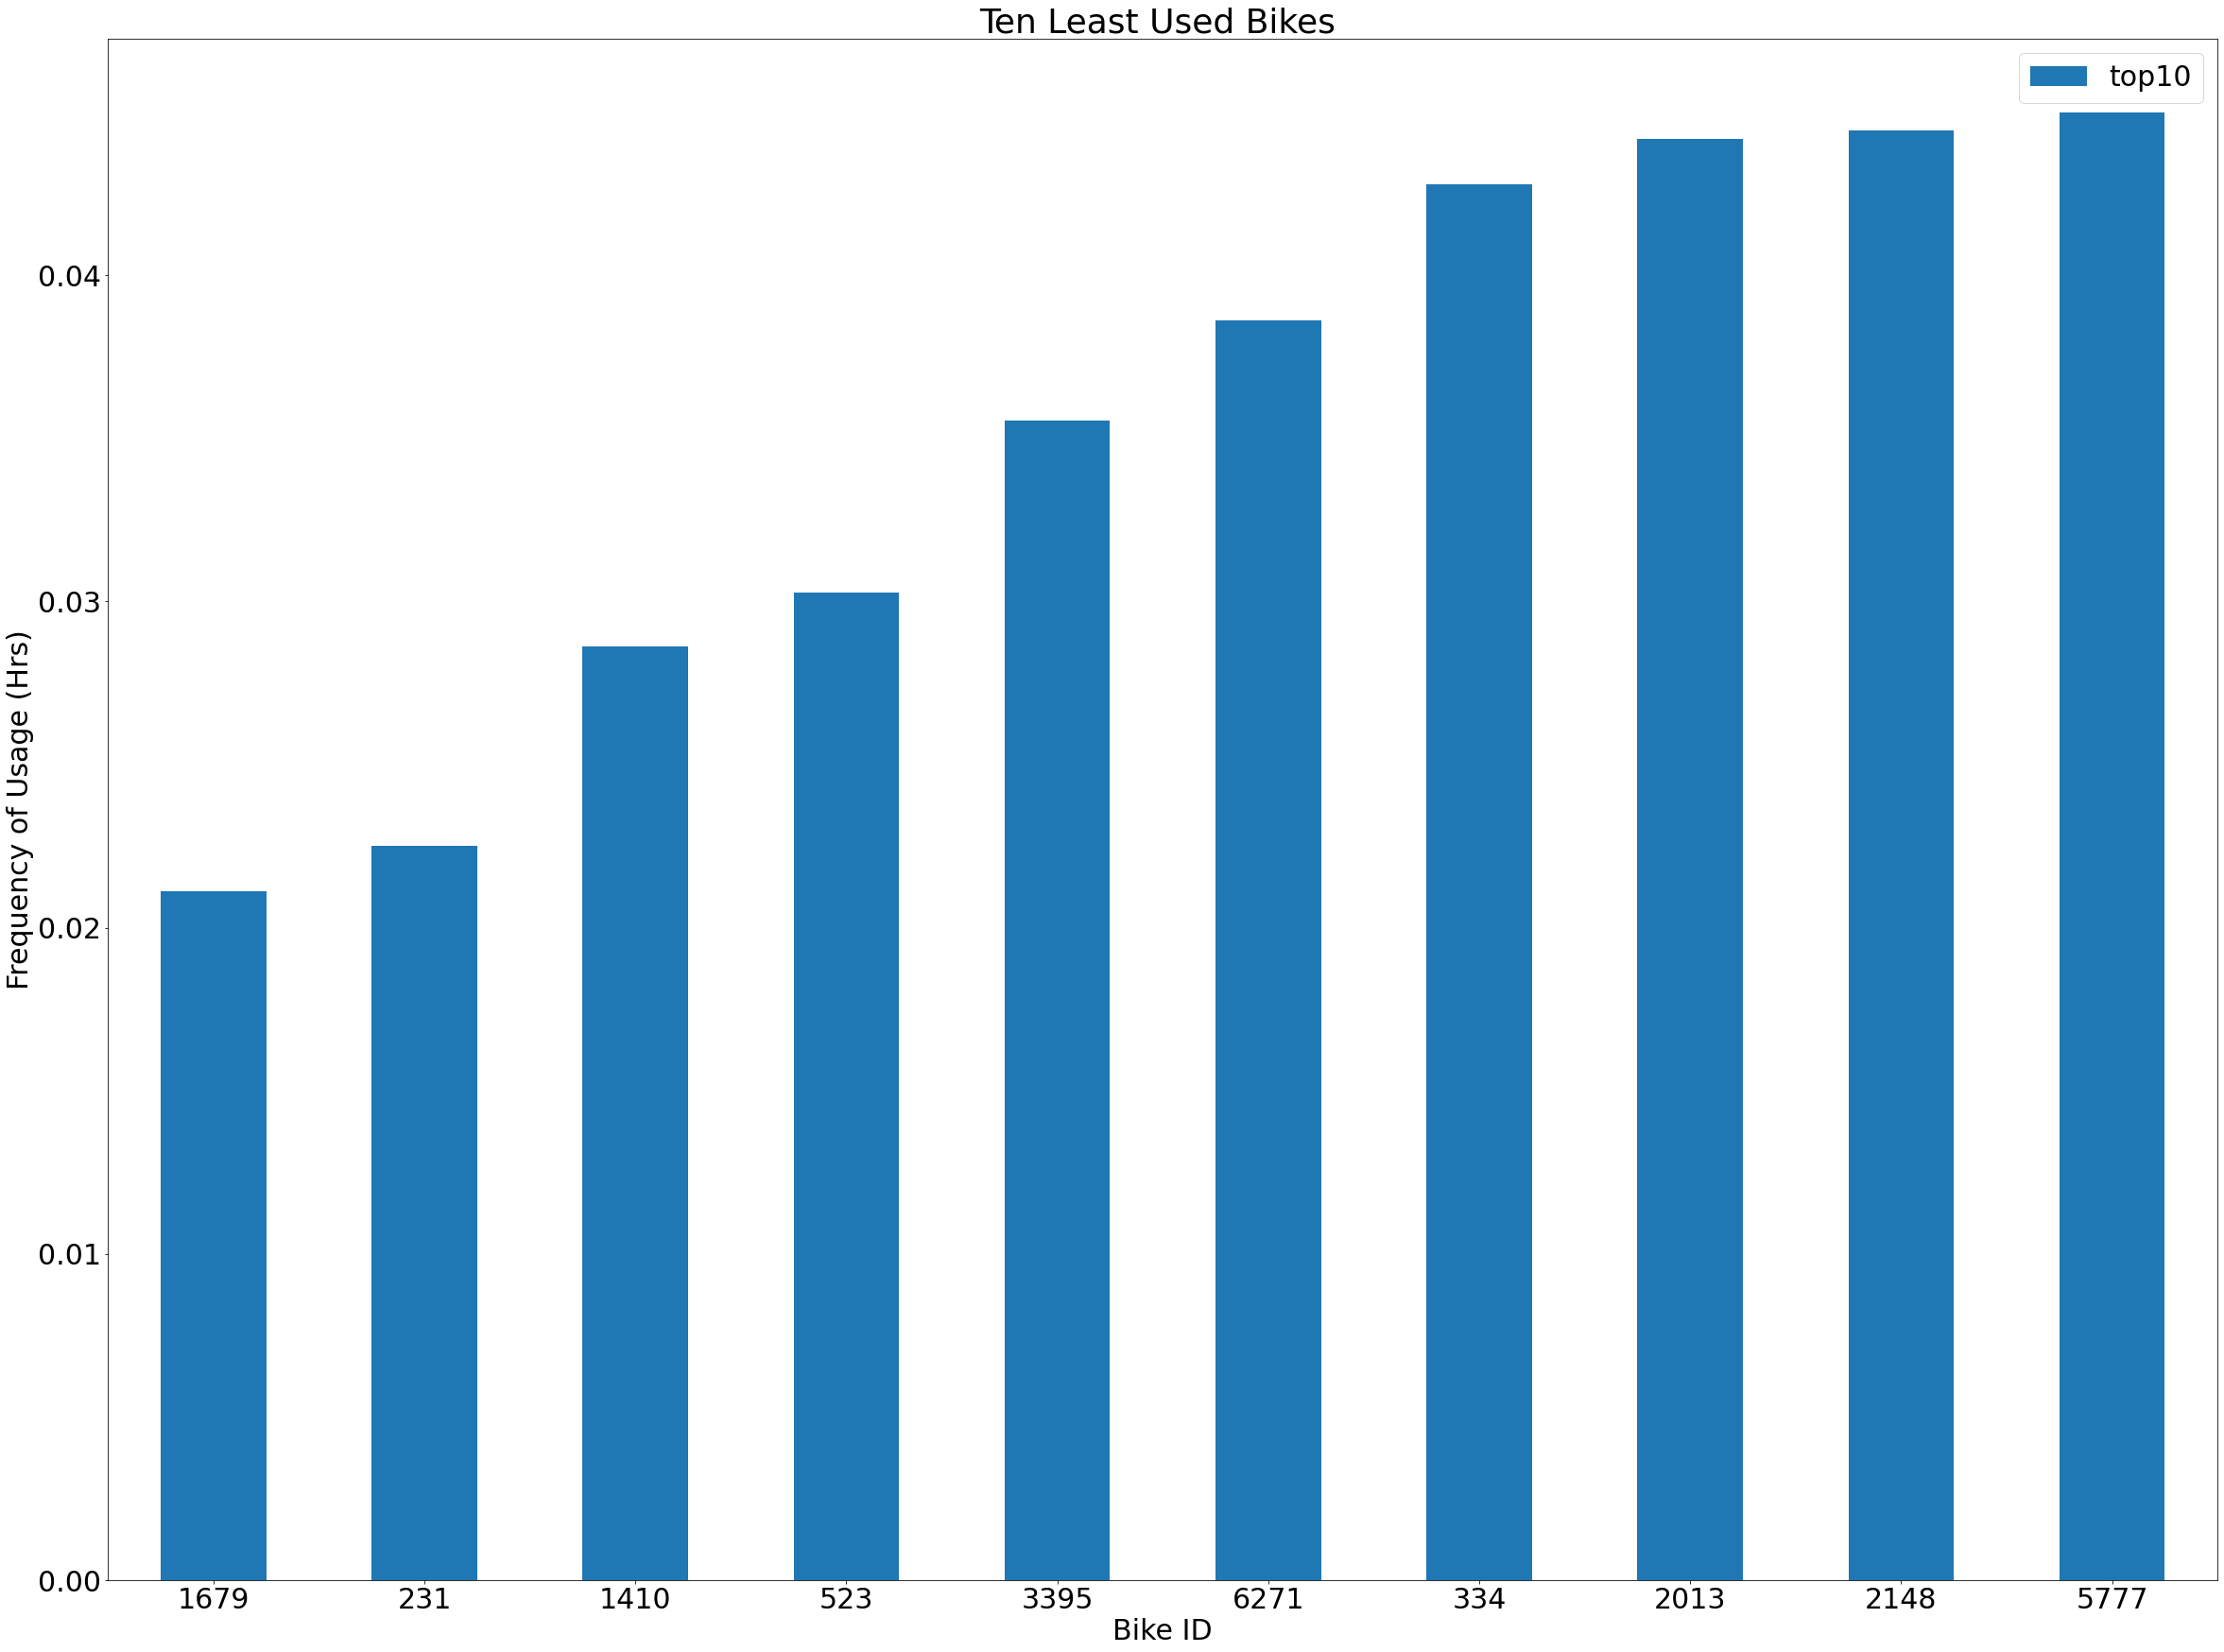

In [76]:
least_used_bikes.plot.bar(x='bike_id', y='top10', rot=0, xlabel = 'Bike ID', ylabel='Frequency of Usage (Hrs)', title = 'Ten Least Used Bikes ')

## Answer

> This is relevant to understand what bikes are least used bikes?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Clients that were born between 1960 and 2000 took shorter trips 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Other gender having a larger mean than the rest

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Question

> What is the dis tribution of gender with respect to birth year and duration?

C:\Users\alaha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


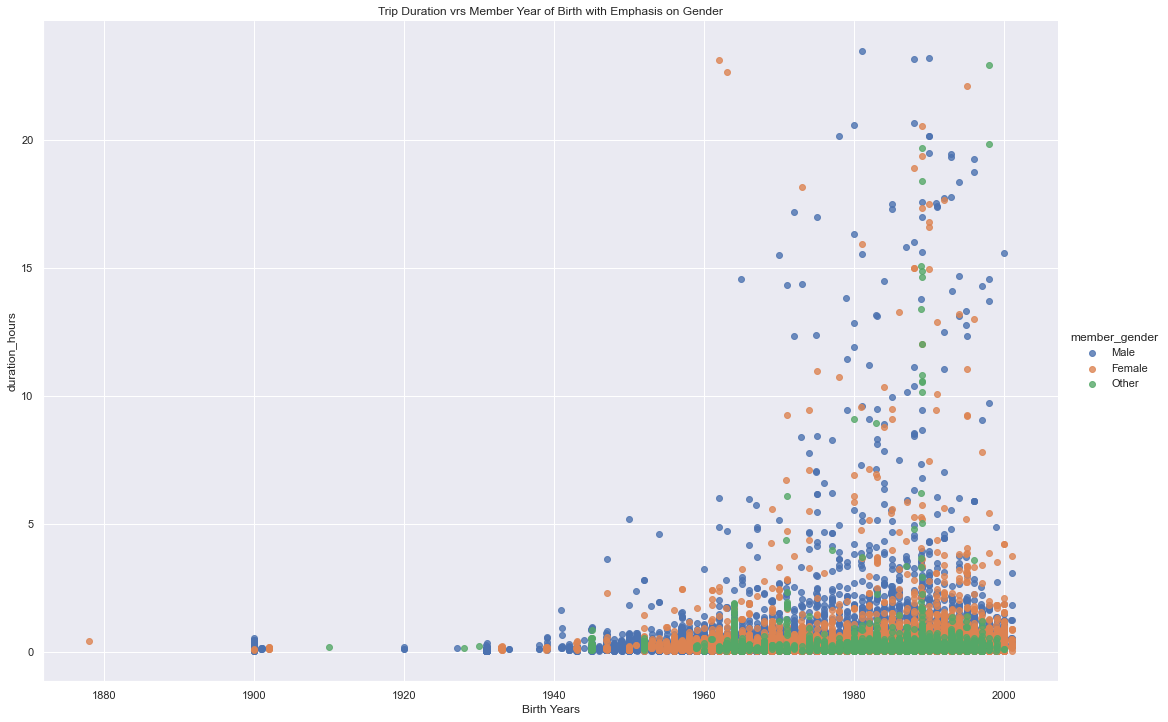

In [43]:
g = sb.FacetGrid(data = tripdata_final, hue = 'member_gender', hue_order = ['Male','Female','Other'], size =10, aspect = 1.5)


g = g.map (sb.regplot, 'member_birth_year', 'duration_hours', x_jitter = 0.04, fit_reg=False)
g.add_legend()
plt.xlabel('Birth Years')

plt.title('Trip Duration vrs Member Year of Birth with Emphasis on Gender');

## Question

> What relationship between user type, member birth year and duration in hours?

C:\Users\alaha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 23.006875000000008, 'Time of Day')

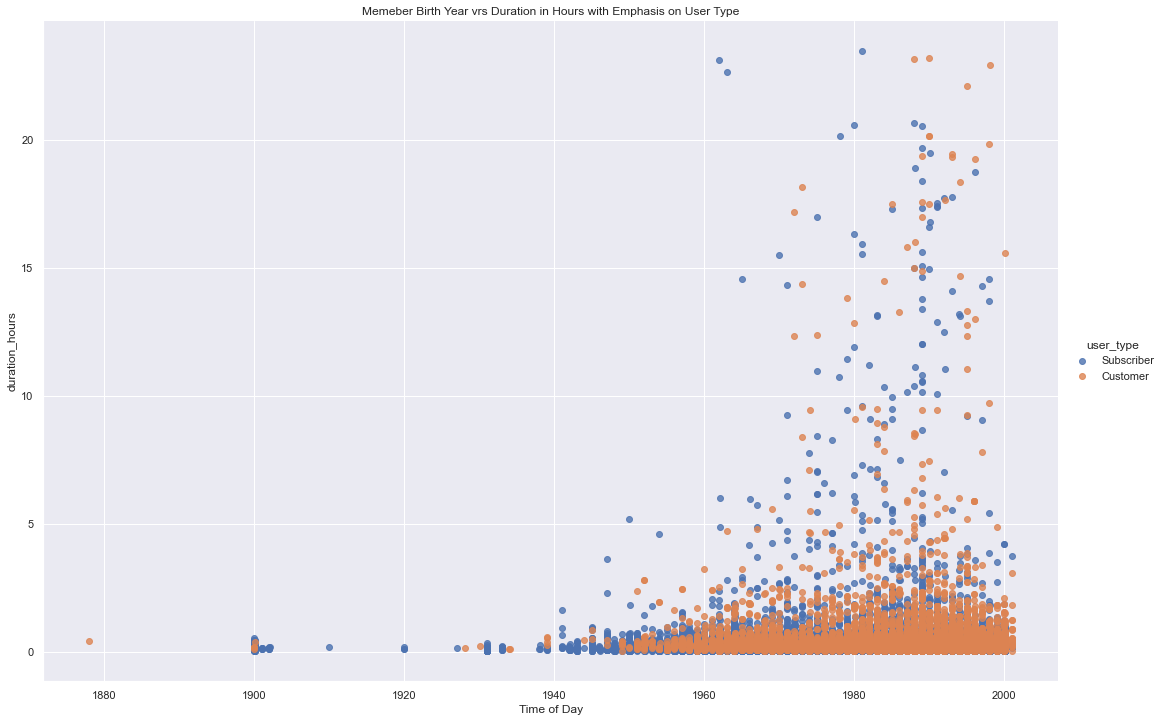

In [46]:
g = sb.FacetGrid(data = tripdata_final, hue = 'user_type', hue_order = ['Subscriber','Customer'], size =10, aspect = 1.5)


g = g.map (sb.regplot, 'member_birth_year', 'duration_hours', x_jitter = 0.04, fit_reg=False)
g.add_legend()


plt.title('Memeber Birth Year vrs Duration in Hours with Emphasis on User Type')
plt.xlabel('Time of Day');


## Question 

> What is the relationship between bike share for trip, member birth year and duration in hours?

C:\Users\alaha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 23.006875000000008, 'Birth Years')

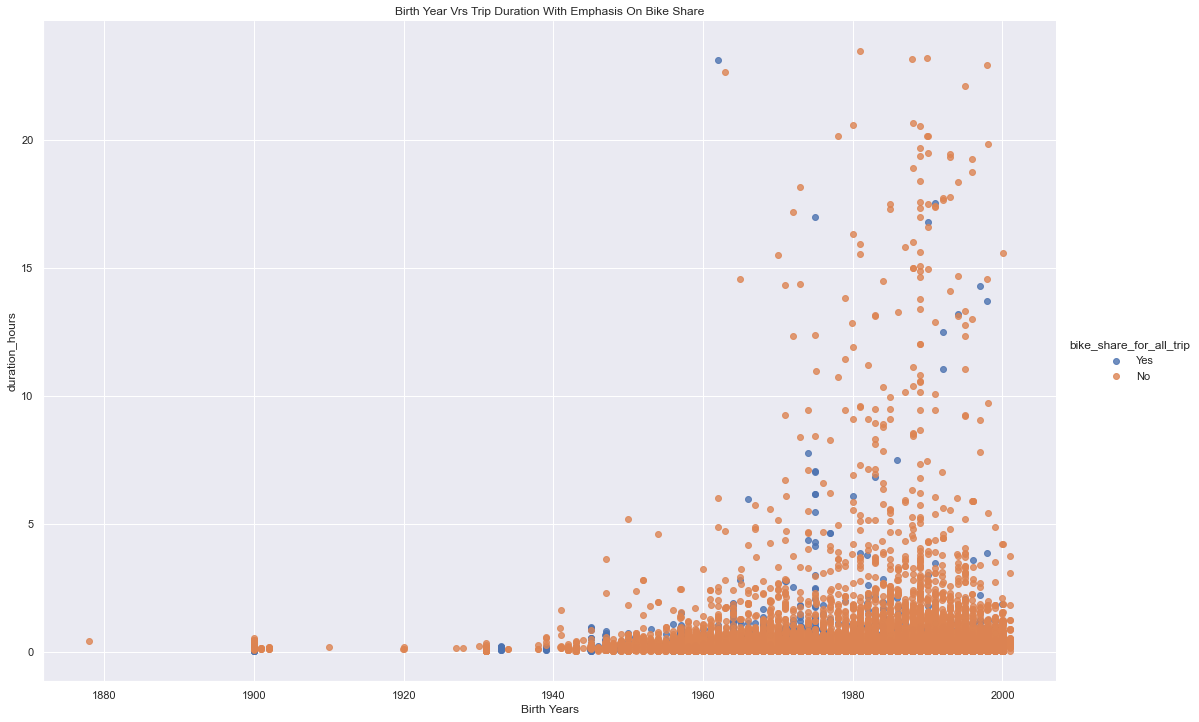

In [50]:
g = sb.FacetGrid(data = tripdata_final, hue = 'bike_share_for_all_trip', hue_order = ['Yes','No'], size =10, aspect = 1.5)


g = g.map (sb.regplot, 'member_birth_year', 'duration_hours', x_jitter = 0.04, fit_reg=False)
g.add_legend()

plt.title('Birth Year Vrs Trip Duration With Emphasis On Bike Share')
plt.xlabel('Birth Years');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the project it was clear that the constant relationship running through was how gender and birth year influence ride duration. 

### Were there any interesting or surprising interactions between features?

> Everything was to be expected

## Conclusions
>Finding from the project indicated that the most used bike was the bike with the code 5481, this helps maintenance scheduling. The study revealed that there majority of males in the gender and also subcriber are more than customers. This helps in the development of marketing plan to balance the scale in term of gender and user types. 

> Also the study revealed the most used start stations, together with period and days it can be used to anticipate traffic.

